In [1]:
#libs 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import linregress

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

In [2]:
SP500 = pd.read_csv('S&P 500 Historical Data.csv') #read based on type 
# Date row = 0 (newest), while row = max (oldest), reverse order 
SP500 = SP500.iloc[::-1].reset_index(drop=True)
SP500

,Date,Price,Open,High,Low,Vol.,Change %
0,01/24/2000,"1,401.50","1,441.40","1,454.20","1,395.40",NaN,-2.77%
1,01/25/2000,"1,410.00","1,401.50","1,414.30","1,388.50",NaN,0.61%
2,01/26/2000,"1,404.10","1,410.00","1,412.50","1,400.10",NaN,-0.42%
3,01/27/2000,"1,398.60","1,404.10","1,419.00","1,380.50",NaN,-0.39%
4,01/28/2000,"1,360.20","1,398.60","1,398.60","1,356.10",NaN,-2.75%
...,...,...,...,...,...,...,...
4995,11/29/2019,"3,141.00","3,147.20","3,150.30","3,139.30",NaN,-0.40%
4996,12/02/2019,"3,113.90","3,143.80","3,144.30","3,110.80",NaN,-0.86%
4997,12/03/2019,"3,093.20","3,087.40","3,095.00","3,070.30",NaN,-0.66%
4998,12/04/2019,"3,112.80","3,103.50","3,119.40","3,102.50",NaN,0.63%


In [3]:
# Check for NaN 
print(SP500.notna().any()) #Check if any rows contain any NaN

# Seems Vol. Coins some NaN Values... i wonder if there is any real values?
print(SP500["Vol."].max()) # 
# Max value = nan, most mean the whole col is empty... will drop it. 
SP500 = SP500.drop("Vol.", axis=1)
SP500

Date         True
Price        True
Open         True
High         True
Low          True
Vol.        False
Change %     True
dtype: bool
nan


,Date,Price,Open,High,Low,Change %
0,01/24/2000,"1,401.50","1,441.40","1,454.20","1,395.40",-2.77%
1,01/25/2000,"1,410.00","1,401.50","1,414.30","1,388.50",0.61%
2,01/26/2000,"1,404.10","1,410.00","1,412.50","1,400.10",-0.42%
3,01/27/2000,"1,398.60","1,404.10","1,419.00","1,380.50",-0.39%
4,01/28/2000,"1,360.20","1,398.60","1,398.60","1,356.10",-2.75%
...,...,...,...,...,...,...
4995,11/29/2019,"3,141.00","3,147.20","3,150.30","3,139.30",-0.40%
4996,12/02/2019,"3,113.90","3,143.80","3,144.30","3,110.80",-0.86%
4997,12/03/2019,"3,093.20","3,087.40","3,095.00","3,070.30",-0.66%
4998,12/04/2019,"3,112.80","3,103.50","3,119.40","3,102.50",0.63%


In [4]:
# pretty up the data : 3,096.60 => 3096.60
# 0.25% => 0.25
cols_to_fix = ["Price", "Open", "High", "Low"]

for col in cols_to_fix:
    SP500[col] = SP500[col].str.replace(',', '', regex=False).astype(float)
    
SP500["Change %"] = SP500["Change %"].astype(str).str.rstrip('%').astype(float)
SP500

,Date,Price,Open,High,Low,Change %
0,01/24/2000,1401.5,1441.4,1454.2,1395.4,-2.77
1,01/25/2000,1410.0,1401.5,1414.3,1388.5,0.61
2,01/26/2000,1404.1,1410.0,1412.5,1400.1,-0.42
3,01/27/2000,1398.6,1404.1,1419.0,1380.5,-0.39
4,01/28/2000,1360.2,1398.6,1398.6,1356.1,-2.75
...,...,...,...,...,...,...
4995,11/29/2019,3141.0,3147.2,3150.3,3139.3,-0.40
4996,12/02/2019,3113.9,3143.8,3144.3,3110.8,-0.86
4997,12/03/2019,3093.2,3087.4,3095.0,3070.3,-0.66
4998,12/04/2019,3112.8,3103.5,3119.4,3102.5,0.63


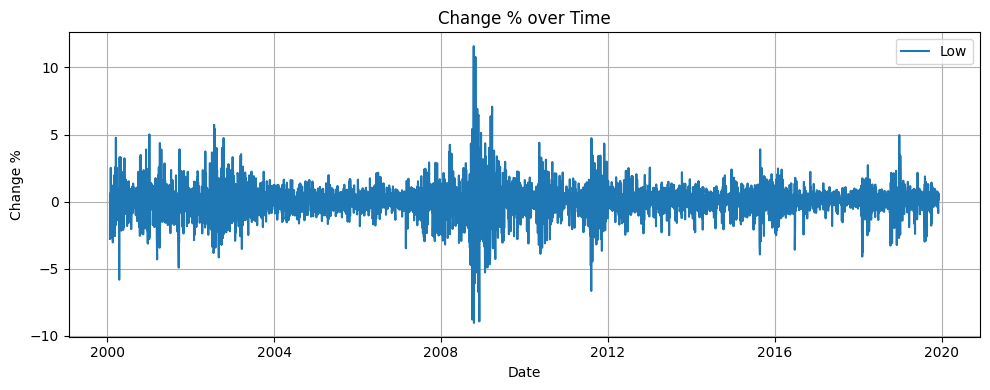

In [5]:
# Set Date as index if it's not already
SP500["Date"] = pd.to_datetime(SP500["Date"])
SP500.set_index("Date", inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(SP500.index, SP500["Change %"], label=col)
plt.title("Change % over Time") #f"{col} => f strint of the variable col... i.e., Price Open etc.
plt.xlabel("Date")
plt.ylabel("Change %")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# How return changes over time based on daily returns. 
Observation: Daily return throughout 2000 until 2020 is -5 to 5%, research suggests that you can expect a yearly return of 8%. This may be because how I chose to print the data looks at return per day and not yearly return. 

# Visualize the Price per year 

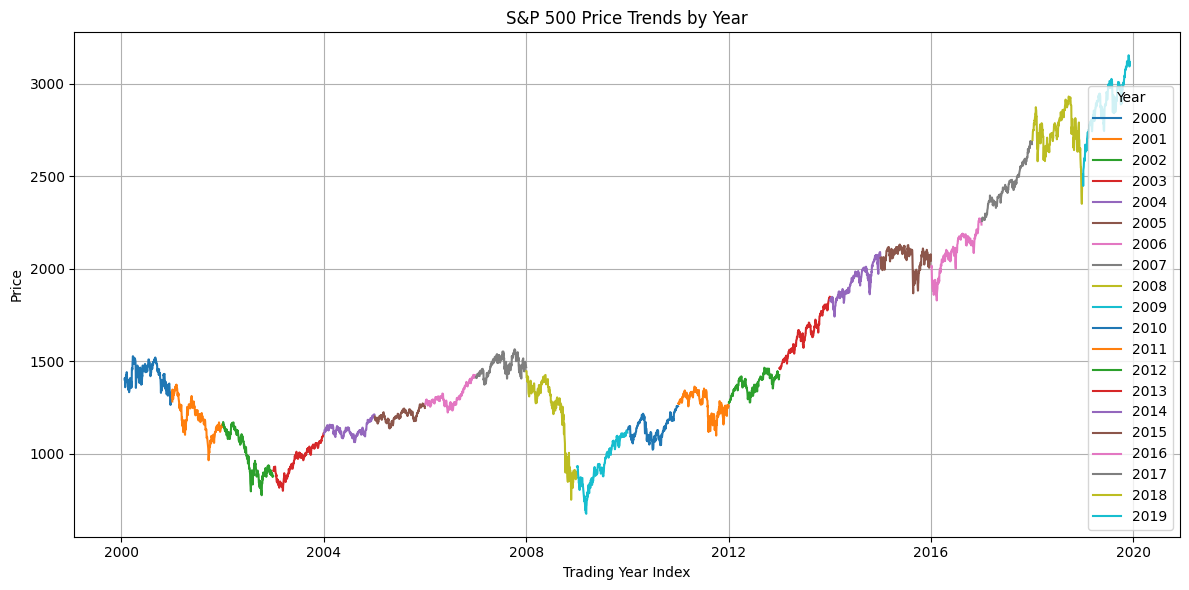

In [6]:
unique_year = SP500.index.year.unique()
plt.figure(figsize=(12, 6))

for year in unique_year:
    data_for_this_year = SP500[SP500.index.year == year]
    plt.plot(
        data_for_this_year["Price"],
        label=str(year)  # Add label for legend
    )

plt.xlabel("Trading Year Index")
plt.ylabel("Price")
plt.title("S&P 500 Price Trends by Year")
plt.legend(title="Year")  # Show legend
plt.grid(True)
plt.tight_layout()
plt.show()

# Observation of Price per year 
Price during 2000 started to go down around 2001 and it continued to go down until 2003 ish. This timeframe includes the dot.com bubble, massive scandals and the amount of bad events appears to have stopped somewhere around 2003. 

The price starts to increase and then falls at around 2008 which is the same time USA had the housing crisis, then the price starts to go up until 2016 where it remains stable. The last notable year appears to be 2018 which may be caused by tensions in the USA. 

# What is the Yearly Return? 

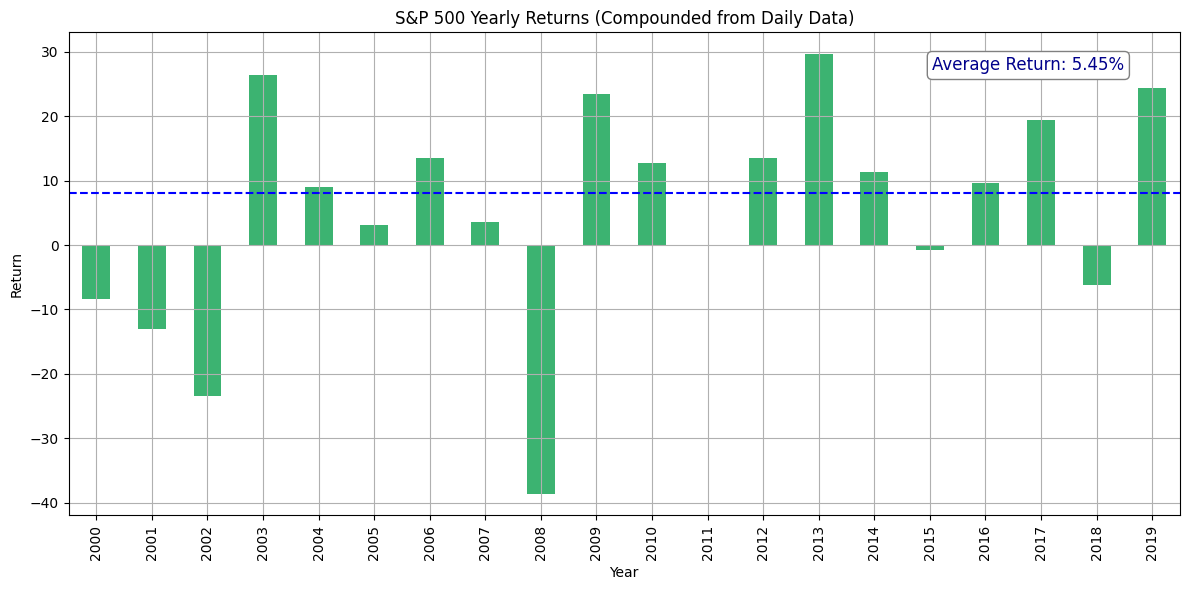

Year
2000    -8.387573
2001   -13.047857
2002   -23.421666
2003    26.340750
2004     8.931750
2005     3.027290
2006    13.572572
2007     3.529906
2008   -38.549143
2009    23.485623
2010    12.786801
2011    -0.030678
2012    13.440871
2013    29.583993
2014    11.351663
2015    -0.822908
2016     9.541143
2017    19.436739
2018    -6.188680
2019    24.419635
Name: Daily Return, dtype: float64

In [7]:
# Step 1: Create a new DataFrame with 'Change %' and preserve the index
SP500_returns = SP500[["Change %"]].copy()

# Step 2: Convert percentage values to decimal format
SP500_returns["Daily Return"] = SP500_returns["Change %"] / 100

# Step 3: Add a 'Year' column from the index
SP500_returns["Year"] = SP500_returns.index.year

# Step 4: Group by year and calculate compounded return
yearly_returns = SP500_returns.groupby("Year")["Daily Return"].apply(lambda x: (1 + x).prod() - 1)*100

# Step 5: Plot the yearly returns


plt.figure(figsize=(12, 6))
yearly_returns.plot(kind='bar', color='mediumseagreen')

# Add horizontal line at 8%
plt.axhline(y=8, color='blue', linestyle='--', label='Expected 8% Return')

yearly_returns.plot(kind='bar', color='mediumseagreen')
plt.title("S&P 500 Yearly Returns (Compounded from Daily Data)")
plt.ylabel("Return")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()

# Add average return as text
avg_return = np.mean(yearly_returns)  
plt.text(
    x=0.95, y=0.95, 
    s=f"Average Return: {avg_return:.2f}%", 
    transform=plt.gca().transAxes,
    fontsize=12,
    color='darkblue',
    ha='right',
    va='top',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
)

plt.show()
yearly_returns

# Observation from Yearly Return

Average return is 5,45% (This is excluding dividends and others), 11 out of 20 years has a yearly return of 8% or more, 6 out of 20 are less than 0 or negative return. 

# People assume 8% yearly return is reasonable, how true is this? 
Here I take the yearly return, and simulate how 10k invested during Jan 1 would be worth after 20 years. 

In [8]:
Total_return = 1 

for returns in yearly_returns: # take each yearly return 
    get_return = 1 + (returns / 100 ) # convert from -8 => 0,92 
    Total_return = Total_return * get_return # starts with 1 * -8%... saves that, next time total return = 1*-8% and we get new return 

intial_sum_2000 = 10*1000 # make a bet of 10k 
print("return after 20 years with actual return  = ", intial_sum_2000 * Total_return)

Yearly_fixed_return = 1.08 
New_return = 1
for i in range (len(unique_year)):
    New_return*=Yearly_fixed_return
    
print("return after 20 years with expected return = ", intial_sum_2000 * New_return)

print ("Diff => ", (intial_sum_2000 * Total_return)/(intial_sum_2000 * New_return))

return after 20 years with actual return  =  21571.87050272878
return after 20 years with expected return =  46609.57143849308
Diff =>  0.46282061467129015


Actual return for 20 years, around 115,71% return 
Expected return for 20 years, 366,09 %

In [9]:
# What is the average return from 2009 to 2020? 

avg_2009_2020 = yearly_returns.loc[2009:2020].mean()
print(f"Average return from 2009 to 2020: {avg_2009_2020:.2f}%")


Average return from 2009 to 2020: 12.45%


# Final notes 

The data per day is too noisy to observe any meaningful trends, too much noise may hide significant events. 
By looking at the yearly returns it was clear that two significant events did occur which are the dot.com bubble and housing crisis. 


People argue all the time about the expected yearly return to be 8%, here I chose to look at 20 years worth of data which includes significant events (dot.com + housing crisis), Yet there is such a massive difference from the expected yearly return and the actual return.

It's important to note that the average returns are influenced heavily by outliners, like 2008 which had a -38% return. The average return after the housing crisis immediately goes up to 12.45%. 

By drawing a line at 8% it includes 11 out of 13 of the positive return, it shows that more often then not (11 out of 20) will the yearly return be > 8% 

It's interesting to see how different 10k invested using 8% (expected return) vs actual return, the actual results is around 100% return whereas the expected return is 350%. 

My conclusion based on this is that, while 8% is often used, it's important to note that this assumes no negative years. Testing with 10k invested, it only took two bad years and it reduced the return by 25k. However, this is not a reason to not invest since more often note the yearly return was not only positive it was above 8%. 